In [22]:
from similarIV import processing_data,instant_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('data/120-years-of-olympic-history-athletes-and-results/athlete_events.csv', encoding='utf8')

In [24]:
df['Medal'] = df['Medal'].fillna('na')

In [25]:
df['Medal'] = df['Medal'].apply(lambda x: 1 if x!='na' else 0)

In [26]:
df = df[['ID','Sex','Age','Height','Weight','Sport','Medal']]

In [27]:
train = df.sample(int(df.shape[0]*0.8))

In [28]:
test = df.drop(train.index, errors="ignore")

In [29]:
test = test.drop(['Medal'],axis=1)

In [30]:
train.head()

,ID,Sex,Age,Height,Weight,Sport,Medal
109235,55239,M,20.0,NaN,NaN,Swimming,0
132856,66879,M,23.0,163.0,59.0,Cross Country Skiing,1
41347,21321,M,22.0,180.0,82.0,Ice Hockey,1
263061,131634,M,27.0,NaN,NaN,Athletics,0
214124,107512,M,26.0,175.0,75.0,Biathlon,0


In [31]:
category_columns = ['Sex','Sport']
continuos_columns = ['Age','Height','Weight']
target_columns = 'Medal'

In [32]:
feature_df, target_df, mean_dict, std_dict, feature_df_columns = processing_data.combine_continus_norm_and_categorical_onehot_and_sep_target(train, continuos_columns, category_columns, target_columns)

In [33]:
feature_df

,Age,Height,Weight,col_Sex_F,col_Sex_M,col_Sport_Aeronautics,col_Sport_Alpine Skiing,col_Sport_Alpinism,col_Sport_Archery,col_Sport_Art Competitions,...,col_Sport_Table Tennis,col_Sport_Taekwondo,col_Sport_Tennis,col_Sport_Trampolining,col_Sport_Triathlon,col_Sport_Tug-Of-War,col_Sport_Volleyball,col_Sport_Water Polo,col_Sport_Weightlifting,col_Sport_Wrestling
109235,-0.594389,-1.857326,-1.676399,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132856,-0.212087,0.361705,0.144591,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41347,-0.339521,0.593138,0.854469,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263061,0.297648,-1.857326,-1.676399,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214124,0.170214,0.525070,0.638419,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153521,0.934817,0.552297,0.669283,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104410,-0.594389,-1.857326,-1.676399,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76720,-0.466955,-1.857326,-1.676399,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63121,-0.212087,0.525070,0.329776,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
mean_dict

{'Age': 25.56029222749404,
 'Height': 175.35046103157296,
 'Weight': 70.72216819250589}

In [35]:
std_dict

{'Age': 6.396381418817165,
 'Height': 10.503682615381445,
 'Weight': 14.370722700449463}

In [36]:
feature_df_columns

Index(['Age', 'Height', 'Weight', 'col_Sex_F', 'col_Sex_M',
       'col_Sport_Aeronautics', 'col_Sport_Alpine Skiing',
       'col_Sport_Alpinism', 'col_Sport_Archery', 'col_Sport_Art Competitions',
       'col_Sport_Athletics', 'col_Sport_Badminton', 'col_Sport_Baseball',
       'col_Sport_Basketball', 'col_Sport_Basque Pelota',
       'col_Sport_Beach Volleyball', 'col_Sport_Biathlon',
       'col_Sport_Bobsleigh', 'col_Sport_Boxing', 'col_Sport_Canoeing',
       'col_Sport_Cricket', 'col_Sport_Croquet',
       'col_Sport_Cross Country Skiing', 'col_Sport_Curling',
       'col_Sport_Cycling', 'col_Sport_Diving', 'col_Sport_Equestrianism',
       'col_Sport_Fencing', 'col_Sport_Figure Skating', 'col_Sport_Football',
       'col_Sport_Freestyle Skiing', 'col_Sport_Golf', 'col_Sport_Gymnastics',
       'col_Sport_Handball', 'col_Sport_Hockey', 'col_Sport_Ice Hockey',
       'col_Sport_Jeu De Paume', 'col_Sport_Judo', 'col_Sport_Lacrosse',
       'col_Sport_Luge', 'col_Sport_Military Ski

In [37]:
target_df

109235    0
132856    1
41347     1
263061    0
214124    0
         ..
153521    0
104410    0
76720     0
63121     0
2498      0
Name: Medal, Length: 216892, dtype: int64

In [38]:
IVs_df, ivs_vector = processing_data.get_IV(feature_df, target_df)

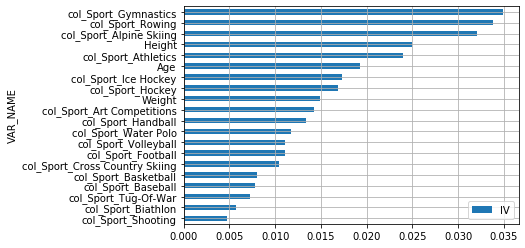

In [39]:
IVs_df.sort_values('IV', ascending=False).head(20).set_index('VAR_NAME').sort_values('IV').plot(kind='barh', grid=True)

In [40]:
ivs_vector

array([1.92787292e-02, 2.49239489e-02, 1.49240768e-02, 4.56944283e-04,
       4.56944283e-04, 9.87347427e-10, 3.20692815e-02, 3.56533260e-07,
       3.20540698e-05, 1.42374909e-02, 2.39172375e-02, 5.93909117e-04,
       7.82985778e-03, 7.99414493e-03, 9.87347427e-10, 3.12111870e-05,
       5.70264457e-03, 2.09194447e-04, 1.51725807e-04, 2.76859460e-03,
       4.35557093e-07, 2.10056454e-04, 1.03987612e-02, 2.94442613e-03,
       2.37872800e-03, 2.76716156e-05, 8.69913639e-05, 6.01533464e-04,
       2.94906824e-04, 1.10216014e-02, 4.46772644e-04, 2.17494398e-04,
       3.48564515e-02, 1.33879078e-02, 1.69182860e-02, 1.72731534e-02,
       1.27031152e-05, 3.03199463e-06, 2.57011018e-06, 1.13098417e-04,
       3.03414456e-04, 6.28520534e-04, 3.59087364e-04, 1.79169163e-04,
       3.95442095e-03, 1.02255956e-03, 3.64369916e-04, 2.54071481e-04,
       3.37630438e-02, 1.75015101e-05, 5.16249226e-04, 2.31164183e-03,
       4.71414763e-03, 4.71767987e-04, 5.01482835e-06, 2.75415152e-03,
      

In [41]:
feature_test = processing_data.process_test_data(test, continuos_columns, category_columns, mean_dict, std_dict, feature_df_columns)

In [42]:
feature_test

,Age,Height,Weight,col_Sex_F,col_Sex_M,col_Sport_Aeronautics,col_Sport_Alpine Skiing,col_Sport_Alpinism,col_Sport_Archery,col_Sport_Art Competitions,...,col_Sport_Table Tennis,col_Sport_Taekwondo,col_Sport_Tennis,col_Sport_Trampolining,col_Sport_Triathlon,col_Sport_Tug-Of-War,col_Sport_Volleyball,col_Sport_Water Polo,col_Sport_Weightlifting,col_Sport_Wrestling
5,-0.712949,0.918682,0.784778,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-0.087595,0.918682,0.784778,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0.850435,0.728272,0.088919,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,1.006774,-0.033366,-0.467768,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,1.006774,-0.033366,-0.467768,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271103,-0.400272,-0.414184,-0.467768,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271105,-0.400272,-0.699798,0.367263,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271109,0.381420,0.728272,0.088919,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,0.225082,0.061839,-0.815698,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
list(feature_test.columns)

['Age',
 'Height',
 'Weight',
 'col_Sex_F',
 'col_Sex_M',
 'col_Sport_Aeronautics',
 'col_Sport_Alpine Skiing',
 'col_Sport_Alpinism',
 'col_Sport_Archery',
 'col_Sport_Art Competitions',
 'col_Sport_Athletics',
 'col_Sport_Badminton',
 'col_Sport_Baseball',
 'col_Sport_Basketball',
 'col_Sport_Basque Pelota',
 'col_Sport_Beach Volleyball',
 'col_Sport_Biathlon',
 'col_Sport_Bobsleigh',
 'col_Sport_Boxing',
 'col_Sport_Canoeing',
 'col_Sport_Cricket',
 'col_Sport_Croquet',
 'col_Sport_Cross Country Skiing',
 'col_Sport_Curling',
 'col_Sport_Cycling',
 'col_Sport_Diving',
 'col_Sport_Equestrianism',
 'col_Sport_Fencing',
 'col_Sport_Figure Skating',
 'col_Sport_Football',
 'col_Sport_Freestyle Skiing',
 'col_Sport_Golf',
 'col_Sport_Gymnastics',
 'col_Sport_Handball',
 'col_Sport_Hockey',
 'col_Sport_Ice Hockey',
 'col_Sport_Jeu De Paume',
 'col_Sport_Judo',
 'col_Sport_Lacrosse',
 'col_Sport_Luge',
 'col_Sport_Military Ski Patrol',
 'col_Sport_Modern Pentathlon',
 'col_Sport_Motorboati

In [44]:
list(feature_df_columns)

['Age',
 'Height',
 'Weight',
 'col_Sex_F',
 'col_Sex_M',
 'col_Sport_Aeronautics',
 'col_Sport_Alpine Skiing',
 'col_Sport_Alpinism',
 'col_Sport_Archery',
 'col_Sport_Art Competitions',
 'col_Sport_Athletics',
 'col_Sport_Badminton',
 'col_Sport_Baseball',
 'col_Sport_Basketball',
 'col_Sport_Basque Pelota',
 'col_Sport_Beach Volleyball',
 'col_Sport_Biathlon',
 'col_Sport_Bobsleigh',
 'col_Sport_Boxing',
 'col_Sport_Canoeing',
 'col_Sport_Cricket',
 'col_Sport_Croquet',
 'col_Sport_Cross Country Skiing',
 'col_Sport_Curling',
 'col_Sport_Cycling',
 'col_Sport_Diving',
 'col_Sport_Equestrianism',
 'col_Sport_Fencing',
 'col_Sport_Figure Skating',
 'col_Sport_Football',
 'col_Sport_Freestyle Skiing',
 'col_Sport_Golf',
 'col_Sport_Gymnastics',
 'col_Sport_Handball',
 'col_Sport_Hockey',
 'col_Sport_Ice Hockey',
 'col_Sport_Jeu De Paume',
 'col_Sport_Judo',
 'col_Sport_Lacrosse',
 'col_Sport_Luge',
 'col_Sport_Military Ski Patrol',
 'col_Sport_Modern Pentathlon',
 'col_Sport_Motorboati

In [45]:
non_in_test_columns = list(set(list(feature_df_columns)) - set(list(feature_test.columns)))

In [46]:
feature_test[feature_df_columns]

,Age,Height,Weight,col_Sex_F,col_Sex_M,col_Sport_Aeronautics,col_Sport_Alpine Skiing,col_Sport_Alpinism,col_Sport_Archery,col_Sport_Art Competitions,...,col_Sport_Table Tennis,col_Sport_Taekwondo,col_Sport_Tennis,col_Sport_Trampolining,col_Sport_Triathlon,col_Sport_Tug-Of-War,col_Sport_Volleyball,col_Sport_Water Polo,col_Sport_Weightlifting,col_Sport_Wrestling
5,-0.712949,0.918682,0.784778,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-0.087595,0.918682,0.784778,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0.850435,0.728272,0.088919,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,1.006774,-0.033366,-0.467768,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,1.006774,-0.033366,-0.467768,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271103,-0.400272,-0.414184,-0.467768,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271105,-0.400272,-0.699798,0.367263,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271109,0.381420,0.728272,0.088919,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,0.225082,0.061839,-0.815698,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
